In [1]:
import pandas as pd
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


C:\Users\APC-PI\AppData\Local\Temp\ipykernel_50180\1487570642.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


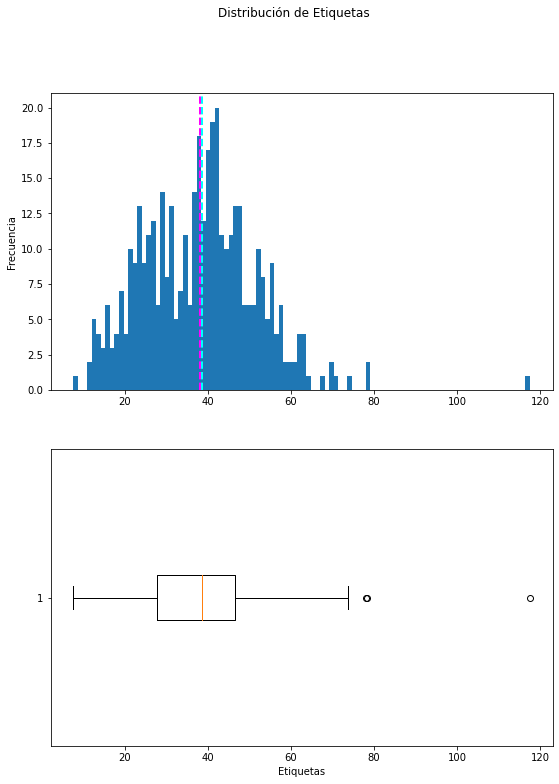

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

label = data[data.columns[-1]]
fig, ax = plt.subplots(2, 1, figsize = (9,12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frecuencia')
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Etiquetas')
fig.suptitle('Distribución de Etiquetas')

fig.show()

C:\Users\APC-PI\AppData\Local\Temp\ipykernel_50180\2883598549.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


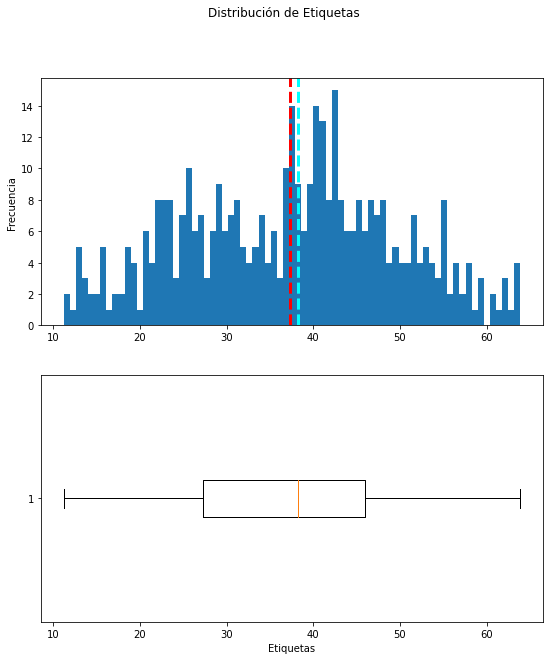

In [5]:
data = data[data['price_per_unit']<65]
data = data[data['price_per_unit']>10]
label = data[data.columns[-1]]
fig, ax = plt.subplots(2, 1, figsize = (9,10))
ax[0].hist(label, bins=75)
ax[0].set_ylabel('Frecuencia')
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=3)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=3)
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Etiquetas')

fig.suptitle('Distribución de Etiquetas')
fig.show()

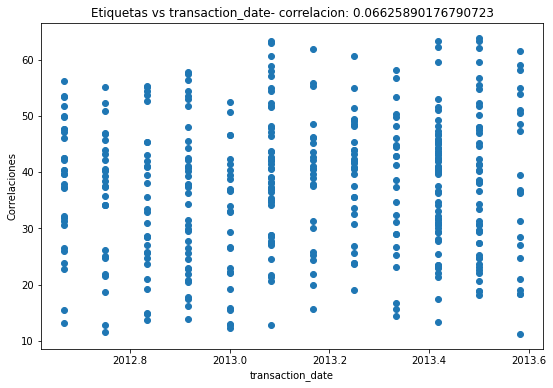

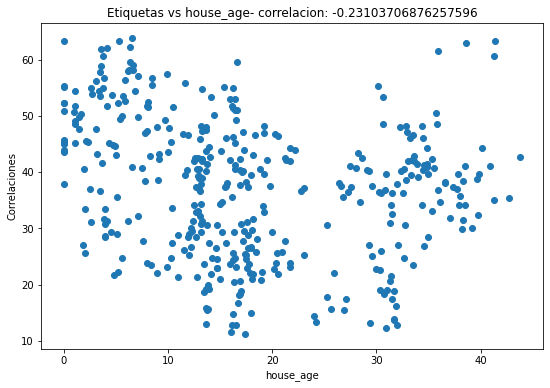

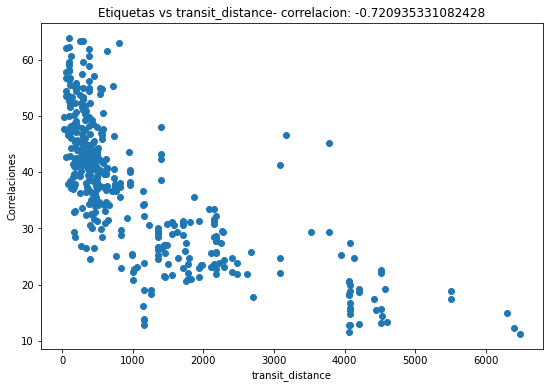

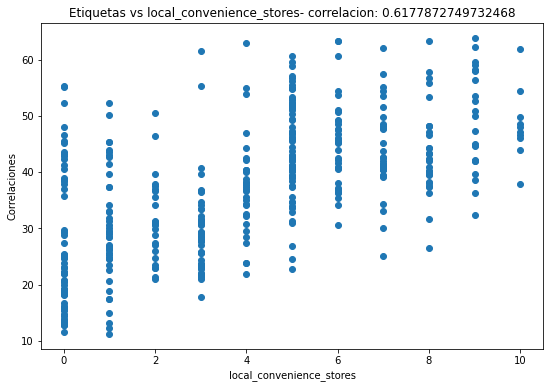

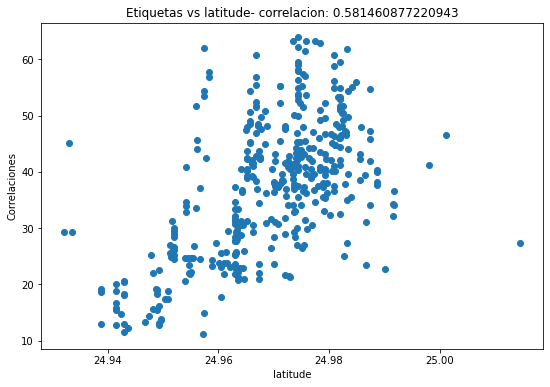

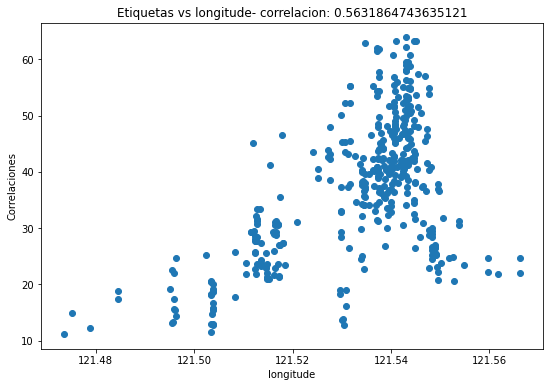

In [6]:
for col in data[data.columns[0:-1]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, )
    plt.xlabel(col)
    plt.ylabel('Correlaciones')
    ax.set_title('Etiquetas vs ' + col + '- correlacion: ' + str(correlation))
plt.show()

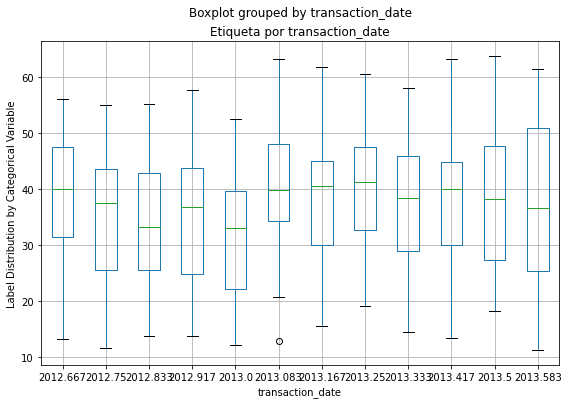

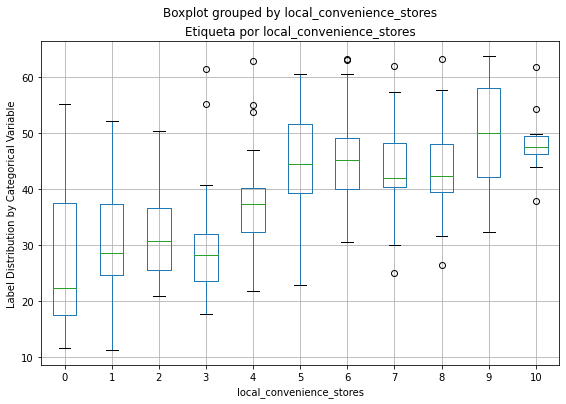

In [7]:
for col in data[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Etiqueta por ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
plt.show()

In [8]:
data.to_csv('data_limp.csv')